# Fundamentos de analítica 2 (clase 2)

## Diego Fernando Agudelo 
## Universidad ICESI 
## diegoagudelo30@gmail.com

## **1. Carga de paquetes**

In [2]:
import pandas as pd
import numpy as np 
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos 
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta

## **2. Carga de datos**

Vamos a usar los datos del libro para hacer las diferentes pruebas.

In [3]:
data = pd.read_excel(r'https://github.com/alfa7g7/Fundamentos-analitica-II/raw/main/Clase%201/Ejercicio%20en%20clase.-20240802/datosEmpleo.xlsx', index_col='mes', parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


(220, 4)


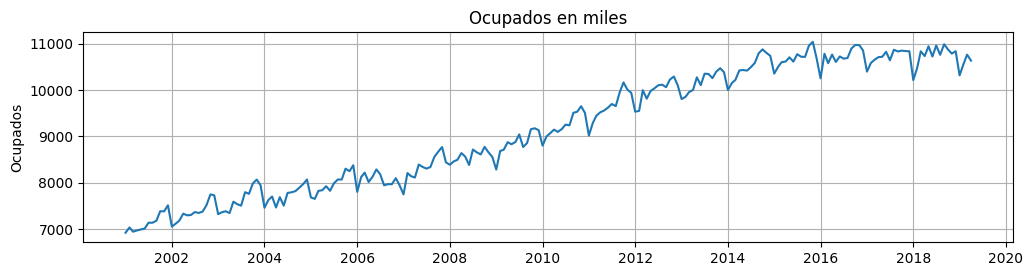

In [44]:
# imprimiendo el tamano del dataframe
print(data.shape)

# Graficando los datos
fig = plt.figure(figsize=(12, 6))

plt.subplot(2,1, 1)
plt.title("Ocupados en miles")
plt.ylabel("Ocupados")
plt.plot(data[["Ocupados"]])
plt.grid()
plt.show()

In [23]:
# Genero mi train con toda la información para que los futuros dummies no se me enloquezcan

month_dummies = pd.get_dummies(data.index.month, drop_first=True).set_index(data.index)
month_dummies = month_dummies.astype(float) # para arreglar el problema de casteo
month_dummies = pd.concat([data, month_dummies], axis=1)# Añadir las variables dummy al final del DataFrame original
month_dummies

,TD_13ciudades,Ocupados,Desocupados,Inactivos,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-02-01,19.894213,7037.746,1747.820,4596.805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-03-01,19.221565,6945.973,1652.823,4807.120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-01,17.888575,6973.079,1519.137,4937.280,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-05-01,17.945654,6994.462,1529.720,4928.911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01,10.725865,10835.398,1301.822,6142.856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-01-01,13.739328,10314.438,1642.851,6343.066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,12.427409,10557.917,1498.272,6264.403,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Separar los datos en entrenamiento y prueba
n_test = 6  # Últimos 6 meses para prueba
train_data = month_dummies.iloc[:-n_test]
test_data = month_dummies.iloc[-n_test:]

In [20]:
train_data

,TD_13ciudades,Ocupados,Desocupados,Inactivos,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-02-01,19.894213,7037.746,1747.820,4596.805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-03-01,19.221565,6945.973,1652.823,4807.120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-01,17.888575,6973.079,1519.137,4937.280,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-05-01,17.945654,6994.462,1529.720,4928.911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-01,11.071347,10720.946,1334.725,6101.948,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-01,10.125100,10959.197,1234.638,5984.340,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-08-01,10.085244,10756.782,1206.529,6235.352,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
test_data

,TD_13ciudades,Ocupados,Desocupados,Inactivos,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,,,,,
2018-11-01,9.844539,10783.299,1177.484,6298.992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-12-01,10.725865,10835.398,1301.822,6142.856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-01-01,13.739328,10314.438,1642.851,6343.066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,12.427409,10557.917,1498.272,6264.403,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-01,11.975098,10760.776,1463.919,6116.140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01,11.144286,10632.028,1333.469,6395.575,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **3. Modelo Tendencia Lineal no simple (Dummies incluidos)**

### **3.1 Modelo Tendencia Lineal simple**

In [45]:
y = train_data["Ocupados"]
x = np.linspace(1,train_data.shape[0],train_data.shape[0])
X = sm.add_constant(x)
lin = sm.OLS(y,X)
lin_t = lin.fit()
print(lin_t.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     5439.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          4.10e-153
Time:                        17:15:42   Log-Likelihood:                -1483.6
No. Observations:                 214   AIC:                             2971.
Df Residuals:                     212   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6916.5808     34.202    202.227      0.0

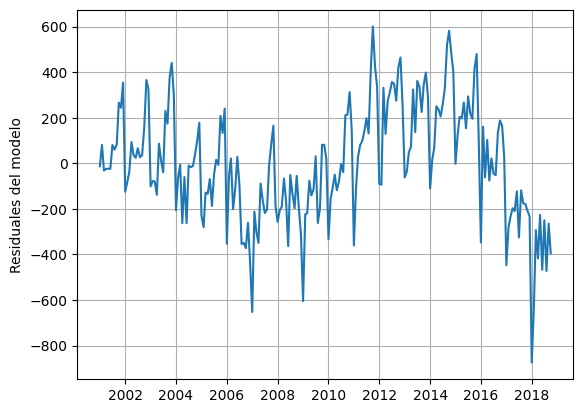

In [46]:
plt.ylabel("Residuales del modelo")
plt.plot(lin_t.resid)
plt.grid()

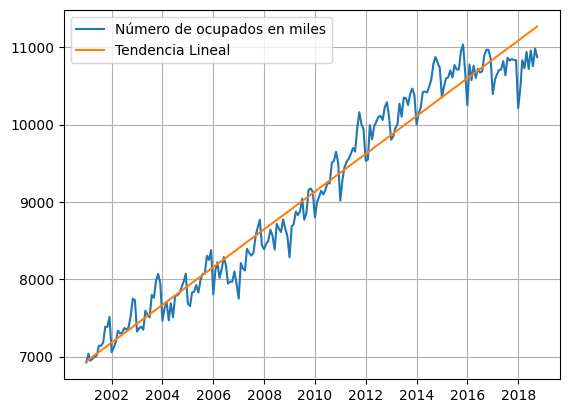

In [47]:
plt.plot(y,label="Número de ocupados en miles")
plt.plot(lin_t.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [48]:
h=6 # Buscamos predecir solo 6 meses
x_for= np.linspace((train_data.shape[0]+1),(train_data.shape[0]+h),h)
X_for= sm.add_constant(x_for)

In [49]:
dt = lin_t.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

   Point_forecast      lower_95      upper_95
0    11290.562073  10794.552484  11786.571663
1    11310.906172  10814.832205  11806.980139
2    11331.250271  10835.111339  11827.389204
3    11351.594370  10855.389885  11847.798855
4    11371.938469  10875.667843  11868.209094
5    11392.282568  10895.945215  11888.619920


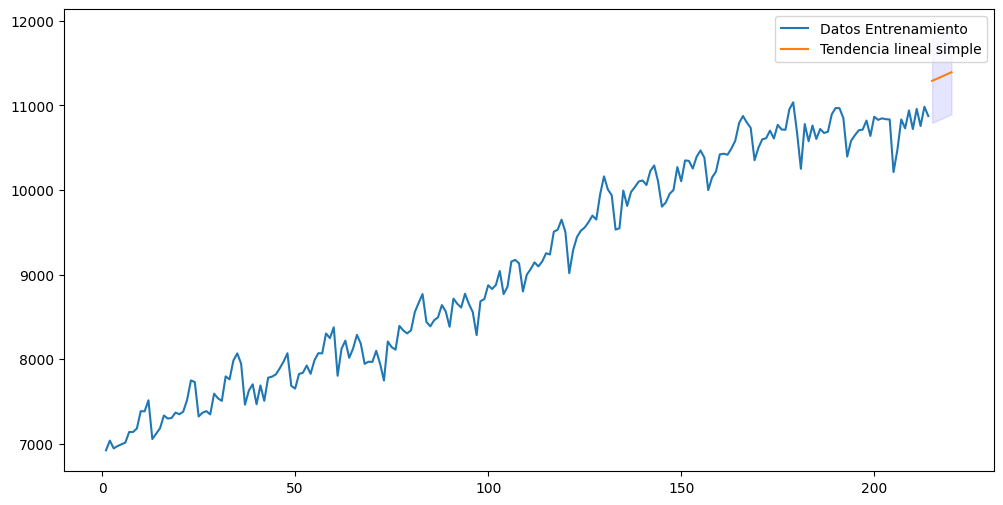

In [50]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds['Point_forecast'],label="Tendencia lineal simple") 
plt.fill_between(x_for ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()


### **3.2 Modelo Tendencia Lineal no simple (Con los dummies incluidos)**

In [51]:
# Variables dependientes (y) e independientes (X) para entrenamiento
y_train = train_data["Ocupados"]
x_train = np.linspace(1, train_data.shape[0], train_data.shape[0])

# Variables dependientes (y) e independientes (X) para prueba
y_test = test_data["Ocupados"]
x_test = np.linspace(1, test_data.shape[0], test_data.shape[0])

# Añadir una constante y ajustar el modelo con los datos de entrenamiento
X_train = sm.add_constant(train_data.drop(columns=["Ocupados"]))  # Incluye todas las columnas excepto "Ocupados"
lin = sm.OLS(y_train, X_train)
lin_t = lin.fit()

# Mostrar el resumen del modelo
print(lin_t.summary())

# Ahora podemos predecir los valores en el conjunto de prueba
X_test = sm.add_constant(test_data.drop(columns=["Ocupados"]))
y_pred = lin_t.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     623.7
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          6.11e-156
Time:                        17:26:54   Log-Likelihood:                -1427.9
No. Observations:                 214   AIC:                             2886.
Df Residuals:                     199   BIC:                             2936.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.096e+04    496.862     22.061

In [52]:
# Comparar predicciones con valores reales
results = pd.DataFrame({"Real": y_test, "Predicción": y_pred})
print(results)

                 Real    Predicción
mes                                
2018-11-01  10783.299  10464.114607
2018-12-01  10835.398  10675.758625
2019-01-01  10314.438  10589.654766
2019-02-01  10557.917  10694.913814
2019-03-01  10760.776  10893.298188
2019-04-01  10632.028  10545.741126


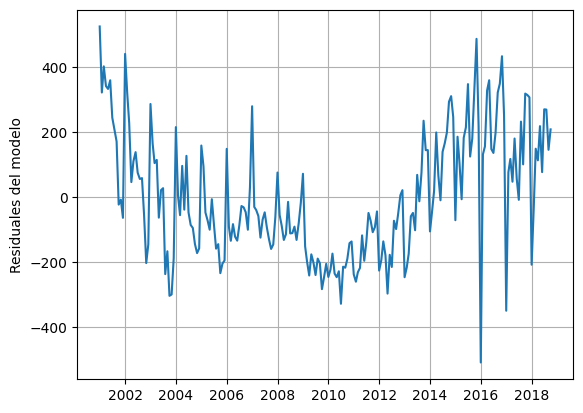

In [53]:
plt.ylabel("Residuales del modelo")
plt.plot(lin_t.resid)
plt.grid()

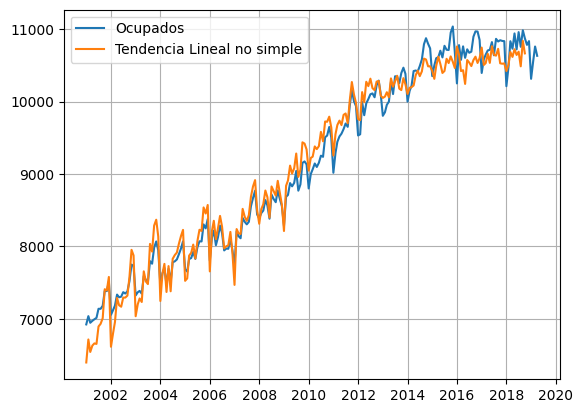

In [54]:
plt.plot(data["Ocupados"], label="Ocupados") # debo usar train_data["Ocupados"] ?
plt.plot(lin_t.fittedvalues, label="Tendencia Lineal no simple")
plt.legend()
plt.grid()
plt.show()

In [55]:
h=6 # pongo h=6 y no 12 porque son 6 meses
x_for= np.linspace((month_dummies.shape[0]+1),(month_dummies.shape[0]+h),h)
X_for = sm.add_constant(test_data.drop(columns=["Ocupados"]))
X_for= sm.add_constant(x_for)

In [57]:
dt = lin_t.get_prediction(X_for).summary_frame(alpha = 0.05)
dt

ValueError: shapes (6,2) and (15,) not aligned: 2 (dim 1) != 15 (dim 0)

In [56]:
dt = lin_t.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

ValueError: shapes (6,2) and (15,) not aligned: 2 (dim 1) != 15 (dim 0)

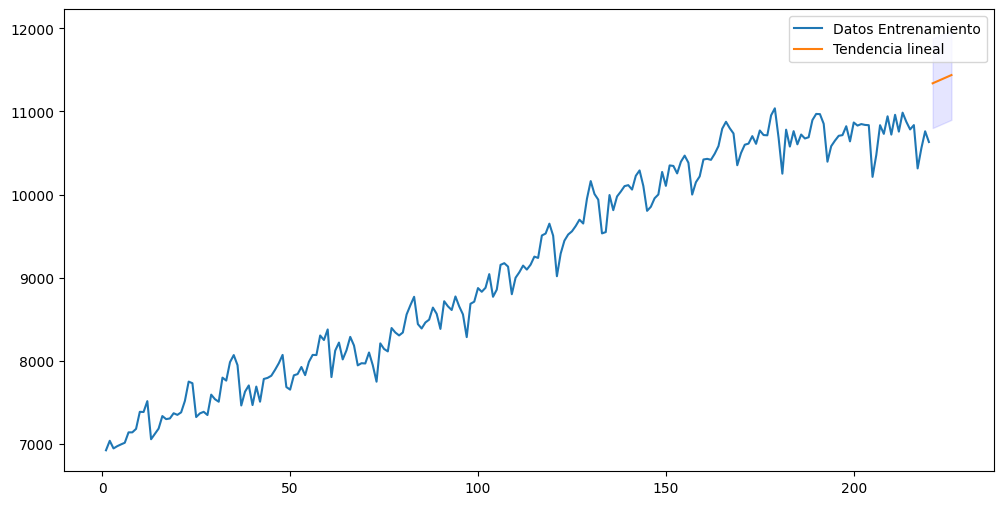

In [31]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds['Point_forecast'],label="Tendencia lineal")
plt.fill_between(x_for ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()


### **7. Tendencia Cuadratica**

In [23]:
y = data["TD_13ciudades"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2
X = sm.add_constant(data[["x","x2"]])
pol = sm.OLS(y,X)
pol_2 = pol.fit()
print(pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:          TD_13ciudades   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     441.2
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           3.50e-77
Time:                        10:32:01   Log-Likelihood:                -361.04
No. Observations:                 220   AIC:                             728.1
Df Residuals:                     217   BIC:                             738.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0036      0.257     74.047      0.0

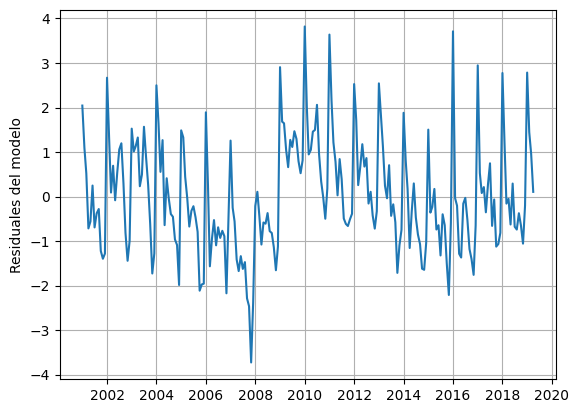

In [24]:
plt.ylabel("Residuales del modelo")
plt.plot(pol_2.resid)
plt.grid()

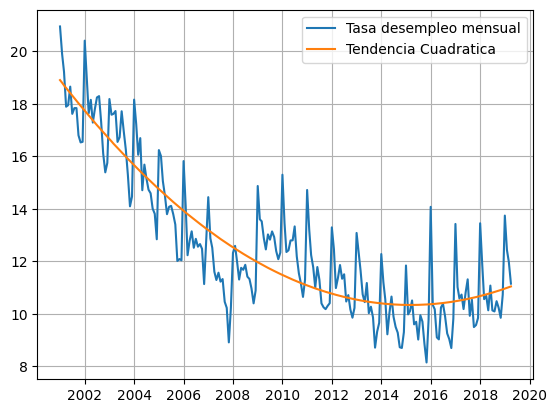

In [25]:
plt.plot(y,label="Tasa desempleo mensual")
plt.plot(pol_2.fittedvalues,label="Tendencia Cuadratica")
plt.legend()
plt.grid()
plt.show()

In [26]:
h=12
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
X_for= sm.add_constant(np.stack((x_for, x_for**2), axis=1))

In [27]:
dt = pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

    Point_forecast  lower_95   upper_95
0        11.067921  8.538615  13.597226
1        11.097721  8.566552  13.628890
2        11.128112  8.595022  13.661203
3        11.159096  8.624026  13.694166
4        11.190672  8.653562  13.727782
5        11.222839  8.683629  13.762050
6        11.255599  8.714226  13.796972
7        11.288950  8.745353  13.832548
8        11.322894  8.777007  13.868781
9        11.357429  8.809189  13.905670
10       11.392557  8.841897  13.943217
11       11.428276  8.875130  13.981422


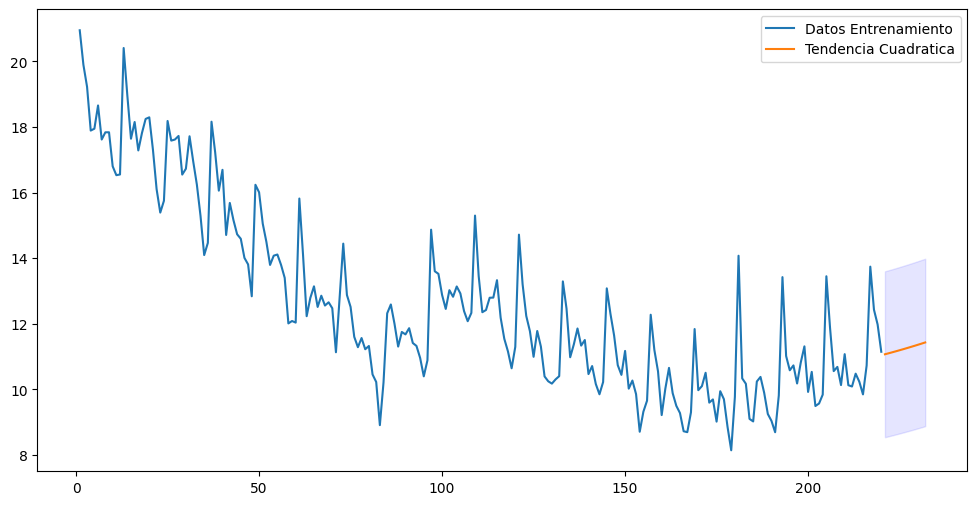

In [28]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds['Point_forecast'],label="Tendencia Cuadratica")
plt.fill_between(x_for ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [29]:
data

,TD_13ciudades,Ocupados,Desocupados,Inactivos,x,x2
mes,,,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718,1.0,1.0
2001-02-01,19.894213,7037.746,1747.820,4596.805,2.0,4.0
2001-03-01,19.221565,6945.973,1652.823,4807.120,3.0,9.0
2001-04-01,17.888575,6973.079,1519.137,4937.280,4.0,16.0
2001-05-01,17.945654,6994.462,1529.720,4928.911,5.0,25.0
...,...,...,...,...,...,...
2018-12-01,10.725865,10835.398,1301.822,6142.856,216.0,46656.0
2019-01-01,13.739328,10314.438,1642.851,6343.066,217.0,47089.0
2019-02-01,12.427409,10557.917,1498.272,6264.403,218.0,47524.0


### **8. Estimación de la Estacionalidad**

In [18]:
# Para solucionar lo del casteo .. 
data.dtypes # para solucionar lo de abajo

TD_13ciudades    float64
Ocupados         float64
Desocupados      float64
Inactivos        float64
dtype: object

In [17]:
# pruebas 
month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)
month_dummies
X = sm.add_constant(month_dummies)
X


,const,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,,
2001-01-01,1.0,False,False,False,False,False,False,False,False,False,False,False
2001-02-01,1.0,True,False,False,False,False,False,False,False,False,False,False
2001-03-01,1.0,False,True,False,False,False,False,False,False,False,False,False
2001-04-01,1.0,False,False,True,False,False,False,False,False,False,False,False
2001-05-01,1.0,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01,1.0,False,False,False,False,False,False,False,False,False,False,True
2019-01-01,1.0,False,False,False,False,False,False,False,False,False,False,False
2019-02-01,1.0,True,False,False,False,False,False,False,False,False,False,False


In [19]:
month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)

# Explicitly convert month dummies to numeric type to fix the error
month_dummies = month_dummies.astype(float) # para arreglar el problema de casteo


# aqui debo hacer el split train / test
y = data["Ocupados"]
X = sm.add_constant(month_dummies)
sea = sm.OLS(y,X)
season = sea.fit()
print(season.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.2787
Date:                Sat, 10 Aug 2024   Prob (F-statistic):              0.989
Time:                        11:37:38   Log-Likelihood:                -1886.0
No. Observations:                 220   AIC:                             3796.
Df Residuals:                     208   BIC:                             3837.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8808.2176    301.805     29.185      0.0

In [20]:
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-03-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-05-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


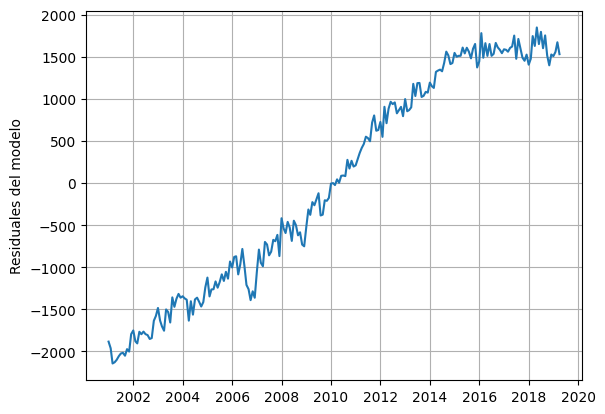

In [21]:
plt.ylabel("Residuales del modelo")
plt.plot(season.resid)
plt.grid()

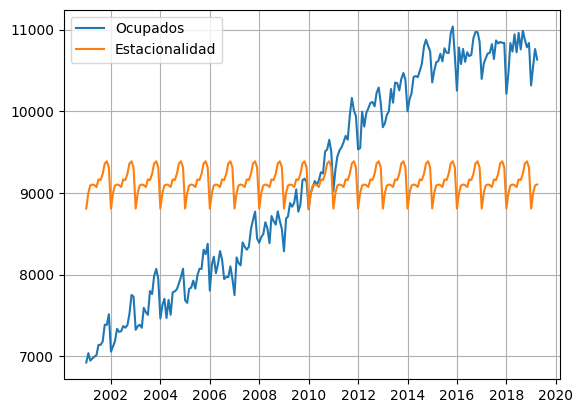

In [22]:
plt.plot(y,label="Ocupados")
plt.plot(season.fittedvalues,label="Estacionalidad")
plt.legend()
plt.grid()
plt.show()

In [23]:
range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=12,freq='MS')

x_for = pd.get_dummies(range_dates.month,drop_first=True)
X_for= sm.add_constant(x_for)
X_for= X_for.astype(float) # modificacion para que corra

In [24]:
dt = season.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast     lower_95      upper_95
2019-05-01     9095.089000  6430.527026  11759.650974
2019-06-01     9071.789000  6407.227026  11736.350974
2019-07-01     9164.935167  6500.373193  11829.497140
2019-08-01     9156.633500  6492.071526  11821.195474
2019-09-01     9232.988500  6568.426526  11897.550474
2019-10-01     9359.934944  6695.372971  12024.496918
2019-11-01     9386.702222  6722.140249  12051.264196
2019-12-01     9310.332667  6645.770693  11974.894640
2020-01-01     8808.217632  6147.348746  11469.086517
2020-02-01     9001.037684  6340.168799  11661.906569
2020-03-01     9090.037158  6429.168273  11750.906043
2020-04-01     9102.647316  6441.778431  11763.516201


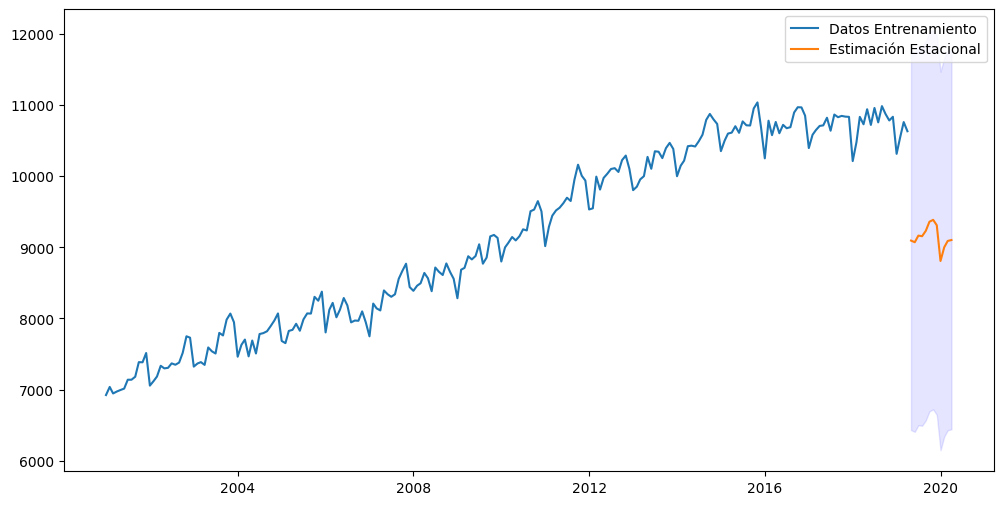

In [25]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

### **9. Tendencia + Estacionalidad**

In [39]:
y = data["TD_13ciudades"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)
# Explicitly convert month dummies to numeric type to fix the error
month_dummies = month_dummies.astype(float) # para arreglar el problema de casteo

X = sm.add_constant( pd.concat([data[["x","x2"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:          TD_13ciudades   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     174.2
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          2.19e-103
Time:                        10:32:02   Log-Likelihood:                -266.22
No. Observations:                 220   AIC:                             560.4
Df Residuals:                     206   BIC:                             607.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.2179      0.249     85.365      0.0

In [40]:
X

,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,,,,
2001-01-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-02-01,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-03-01,1.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-04-01,1.0,4.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-05-01,1.0,5.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01,1.0,216.0,46656.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-01-01,1.0,217.0,47089.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,1.0,218.0,47524.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


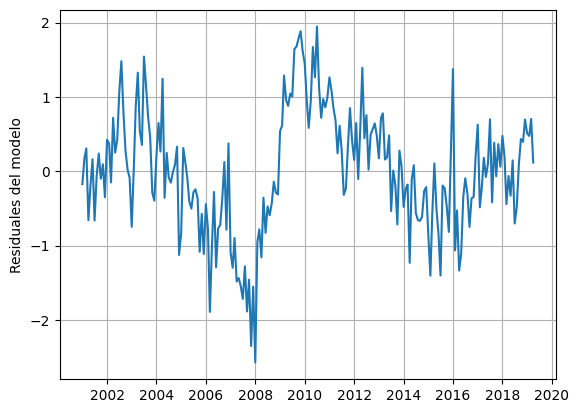

In [41]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

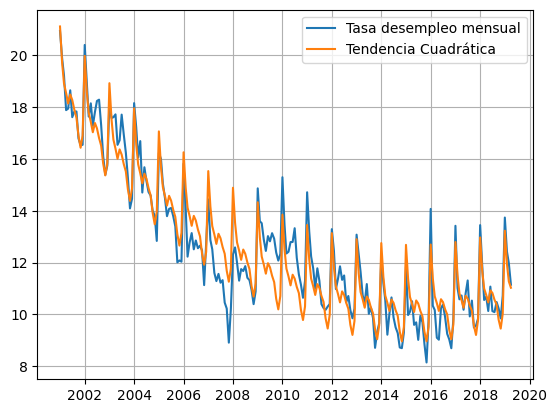

In [46]:
plt.plot(y,label="Tasa desempleo mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Cuadrática")
plt.legend()
plt.grid()
plt.show()

In [47]:
h=12
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2),axis=1),columns=["x","x2"] )

range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True)

# Explicitly convert month dummies to numeric type to fix the error
x_for_dummies = x_for_dummies.astype(float) # para arreglar el problema de casteo


X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1))
X_for

,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
0,1.0,221.0,48841.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,222.0,49284.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,223.0,49729.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,224.0,50176.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,225.0,50625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,226.0,51076.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,227.0,51529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,228.0,51984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,229.0,52441.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,230.0,52900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast   lower_95   upper_95
2019-05-01       10.745957   9.016194  12.475720
2019-06-01       11.219334   9.488506  12.950162
2019-07-01       11.128620   9.396699  12.860541
2019-08-01       10.871674   9.138631  12.604716
2019-09-01       10.693725   8.959533  12.427916
2019-10-01       10.118184   8.382815  11.853553
2019-11-01        9.776879   8.040305  11.513453
2019-12-01       10.364458   8.626652  12.102265
2020-01-01       13.571859  11.836180  15.307538
2020-02-01       12.300687  10.563705  14.037669
2020-03-01       11.626377   9.888061  13.364693
2020-04-01       11.389796   9.650115  13.129477


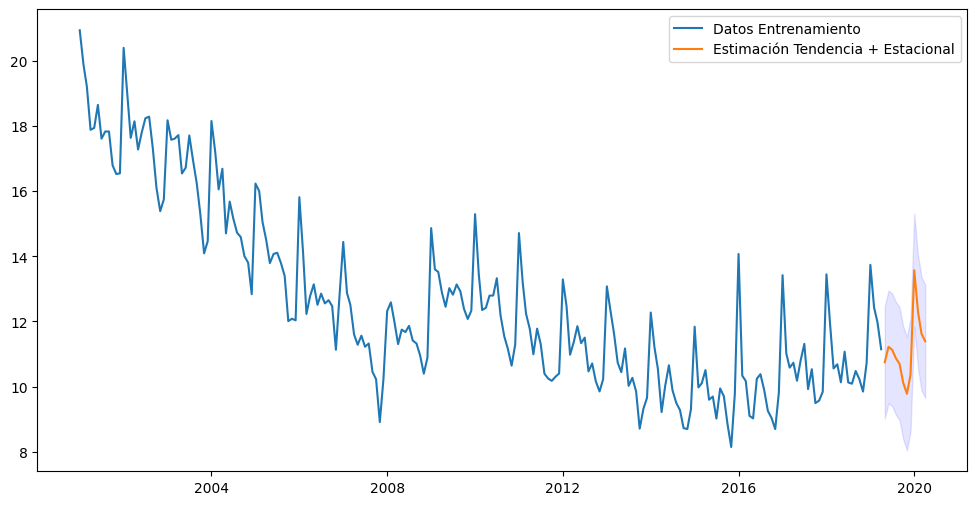

In [49]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

### **10. Comparación de modelos**

Para realizar la comparación de los modelos se debe usar una metrica de desempeño, en la clase anterior usamos el RMSE, la comparación se debe hacer fuera de muestra.

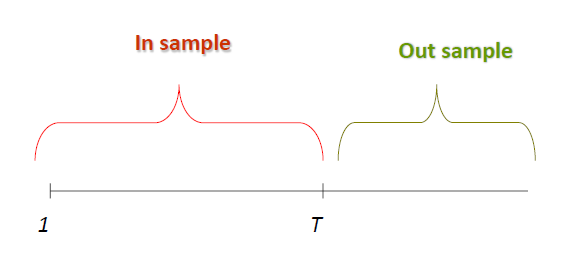

### **11. Evaluación de los supuestos de los residuales**

Para poder hacer uso del modelo y los pronósticos se deben cumplir los supuestos del Teorema de Gauss-Markov sobre los residuales de un modelo de regresión múltiple.

- Probar **Autocorrelación** en los **residuales** con las pruebas Box-Pierce y Ljung-Box para los diferentes rezagos.

- Probar **Homoscedasticidad/Heteroscedasticidad** sobre los residuales, una aproximación para determinar si existe un comportamiento GARCH o ARCH es emplear la prueba de Ljung-Box sobre la serie (sin media) al cuadrado. En este caso al ser residuales de una regresión las series ya tienen media cero.

- Probar **Normalidad** sobre los residuales con las pruebas Jarque Bera y Shapiro-Wilk, adicionalmente se pueden realizar las graficas para ver el comportamiento de manera visual.

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import jarque_bera, shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox

# Supongamos que lin_t es el modelo ajustado anteriormente

# Residuales del modelo
residuals = lin_t.resid

# 1. Prueba de Autocorrelación: Box-Pierce y Ljung-Box
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Prueba de Ljung-Box para Autocorrelación:")
print(lb_test)

# 2. Prueba de Homoscedasticidad: Ljung-Box sobre los residuales al cuadrado
residuals_squared = residuals ** 2
lb_test_squared = acorr_ljungbox(residuals_squared, lags=[10], return_df=True)
print("\nPrueba de Ljung-Box para Heterocedasticidad (residuales al cuadrado):")
print(lb_test_squared)

# 3. Prueba de Normalidad: Jarque-Bera y Shapiro-Wilk
jb_test = jarque_bera(residuals)
shapiro_test = shapiro(residuals)

print("\nPrueba de Jarque-Bera para Normalidad:")
print(f"Estadístico: {jb_test[0]}, p-valor: {jb_test[1]}")
print("Prueba de Shapiro-Wilk para Normalidad:")
print(f"Estadístico: {shapiro_test[0]}, p-valor: {shapiro_test[1]}")

# Visualizaciones para inspección visual de la normalidad
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de los residuales
sns.histplot(residuals, kde=True, ax=axs[0])
axs[0].set_title('Histograma de los Residuales')

# Gráfico Q-Q
sm.qqplot(residuals, line='s', ax=axs[1])
axs[1].set_title('Gráfico Q-Q de los Residuales')

plt.tight_layout()
plt.show()


### **12. Ejercicio en Clase**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior. 

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.